In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sys, os, pathlib, shutil, platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    auc,
)
from sklearn.model_selection import (
    train_test_split, 
    StratifiedShuffleSplit,
    StratifiedKFold,
)

from sklearn.preprocessing import OrdinalEncoder

from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
dataFileName='T_T100_SEGMENT_ALL_CARRIER.csv'
dataPathFull= pathlib.Path('./../../data/paav_cargo/T-100Segment_AllCarriers/DL_SelectFieldsJanuary2022') / dataFileName
myData = pd.read_csv(str(dataPathFull)) 

# T-100 Data January Subset

Distribution of null values (FYI-- no questions)

In [4]:
myData.isnull().sum()

DEPARTURES_SCHEDULED        0
DEPARTURES_PERFORMED        0
PAYLOAD                     0
SEATS                       0
PASSENGERS                  0
FREIGHT                     0
MAIL                        0
DISTANCE                    0
RAMP_TO_RAMP                0
AIR_TIME                    0
UNIQUE_CARRIER              0
AIRLINE_ID                  0
UNIQUE_CARRIER_NAME         0
UNIQUE_CARRIER_ENTITY       0
REGION                      0
CARRIER                     0
CARRIER_NAME                0
CARRIER_GROUP               0
CARRIER_GROUP_NEW           0
ORIGIN_AIRPORT_ID           0
ORIGIN_AIRPORT_SEQ_ID       0
ORIGIN_CITY_MARKET_ID       0
ORIGIN                      0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_ABR         3305
ORIGIN_STATE_FIPS        3923
ORIGIN_STATE_NM          3305
ORIGIN_COUNTRY              0
ORIGIN_COUNTRY_NAME         0
ORIGIN_WAC                  0
DEST_AIRPORT_ID             0
DEST_AIRPORT_SEQ_ID         0
DEST_CITY_MARKET_ID         0
DEST      

  
  Column numbers, column names, non-null counts, and data types (FYI-- no questions)

In [5]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41892 entries, 0 to 41891
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DEPARTURES_SCHEDULED   41892 non-null  float64
 1   DEPARTURES_PERFORMED   41892 non-null  float64
 2   PAYLOAD                41892 non-null  float64
 3   SEATS                  41892 non-null  float64
 4   PASSENGERS             41892 non-null  float64
 5   FREIGHT                41892 non-null  float64
 6   MAIL                   41892 non-null  float64
 7   DISTANCE               41892 non-null  float64
 8   RAMP_TO_RAMP           41892 non-null  float64
 9   AIR_TIME               41892 non-null  float64
 10  UNIQUE_CARRIER         41892 non-null  object 
 11  AIRLINE_ID             41892 non-null  int64  
 12  UNIQUE_CARRIER_NAME    41892 non-null  object 
 13  UNIQUE_CARRIER_ENTITY  41892 non-null  object 
 14  REGION                 41892 non-null  object 
 15  CA

## Question Group 1:
1.1. There are departures performed with zero distance. We'll ignore these, is that okay?
1.2. There are zero performed departures with a nonzero distance, does that distance represent that should have been travelled? We'll ignore these, is that okay?
1.3. There are departures performed with air time is zero. Do you have any insights on how this could happen? We'll ignore these, is that okay?
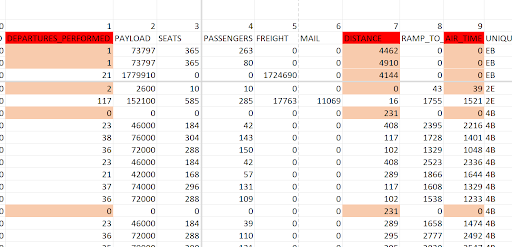

1.4. Some flights originate or finish outside of the US, should we consider them or not for the analysis? 
    There are missing values for columns number 24,25,26 and 35,36,37?   
    [Column 24]: because the states are only for USA...missing is as a result of places not in US so they do not have an associated state  
    [Column 25]: FIPS codes are only for America  
    Columns 24 and 25 are not the same because Canada has state abrevs, but does not have state fips  
    [Column 26]: same as 24, but the full name instead of the abbrevs...so same reasoning as to why its missing some values  
  
  For columns 35, 36, 27: same reasoning respective to 24,25,26 but now its for destinations instead of origin  
  


## Question Group 2:
2.1. What is 41 and 42: AIRCRAFT_GROUP and AIRCRAFT_TYPE, and are they important for the analysis? See charts below.  
2.2. I plan to cover different space aggregations: aiport, city, region, state, national. Is region smaller than state?    
2.3. For aircraft configuration(column 43) there are three possibilites (passenger, cargo, or both) as described in the documentation, but our data has 4 values (1,2,3,4).   
  Question 2.3.1: Does 1, 2, 3 represent passenger, cargo, or both?     
  Question 2.3.2: What's the meaning of value 4, and should I ignore it?    
2.4 For column 47 and 48: What is DISTANCE_GROUP  and CLASS?    
2.5 For column 17 and 18: What is CARRIER_GROUP and CARRIER_GROUP_NEW?    

<AxesSubplot:title={'center':'distinct value counts for AIRCRAFT_GROUP'}>

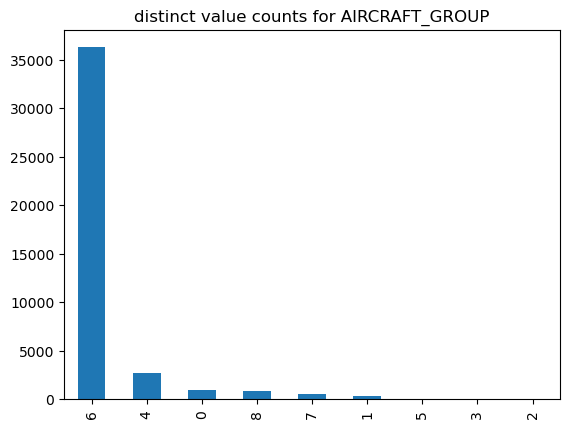

In [6]:
myData['AIRCRAFT_GROUP'].value_counts().plot(kind="bar", title = "distinct value counts for AIRCRAFT_GROUP")


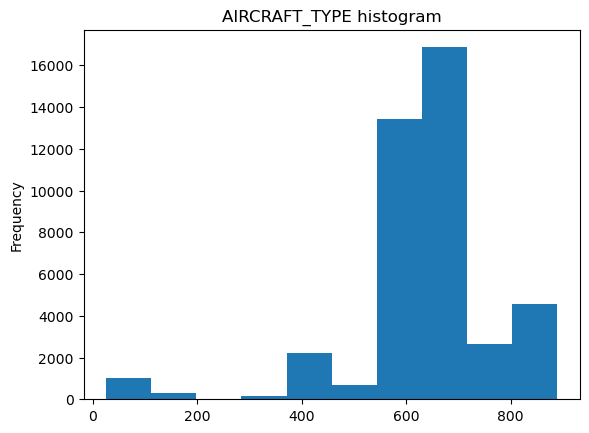

In [7]:
# myData['AIRCRAFT_TYPE'].value_counts().plot(kind="barh")
hist03 = myData['AIRCRAFT_TYPE'].plot(kind='hist', title='AIRCRAFT_TYPE histogram')

<AxesSubplot:title={'center':'distinct value counts for AIRCRAFT_CONFIG'}>

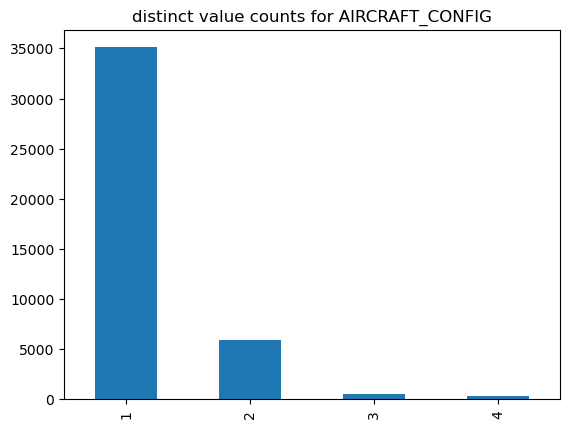

In [8]:
myData['AIRCRAFT_CONFIG'].value_counts().plot(kind="bar", title = "distinct value counts for AIRCRAFT_CONFIG")

Basic descriptive statistics for numeric columns: FYI no questions

In [9]:
myData.describe()
myData.corr()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP
count,41892.000000,41892.00000,4.189200e+04,41892.000000,41892.000000,4.189200e+04,4.189200e+04,41892.000000,41892.000000,41892.000000,...,41892.000000,37962.000000,41892.000000,41892.000000,41892.000000,41892.000000,41892.0,41892.0,41892.0,41892.000000
mean,16.778072,17.70369,7.459045e+05,2093.304784,1352.099542,1.057044e+05,2.942205e+03,1121.702783,2409.322735,1998.715005,...,32087.183758,24.984985,85.303495,5.737157,643.495799,1.189081,2022.0,1.0,1.0,2.775351
std,30.029655,28.22687,1.423294e+06,3944.605485,2675.875950,5.684864e+05,3.117824e+04,1227.387191,4213.312843,3653.706624,...,1501.803449,17.539574,144.858635,1.163127,142.937454,0.470294,0.0,0.0,0.0,2.439504
min,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,30006.000000,1.000000,1.000000,0.000000,26.000000,1.000000,2022.0,1.0,1.0,1.000000
25%,0.000000,1.00000,4.340000e+04,50.000000,5.000000,0.000000e+00,0.000000e+00,372.000000,135.000000,106.000000,...,30852.000000,9.000000,33.000000,6.000000,614.000000,1.000000,2022.0,1.0,1.0,1.000000
50%,4.000000,6.00000,2.102910e+05,380.000000,246.000000,0.000000e+00,0.000000e+00,804.000000,590.000000,480.000000,...,31703.000000,21.000000,52.000000,6.000000,641.000000,1.000000,2022.0,1.0,1.0,2.000000
75%,24.000000,25.00000,9.327100e+05,2625.000000,1634.000000,2.608250e+03,0.000000e+00,1341.000000,3086.000000,2413.000000,...,33180.000000,41.000000,84.000000,6.000000,698.000000,1.000000,2022.0,1.0,1.0,3.000000
max,589.000000,560.00000,4.087650e+07,71680.000000,48622.000000,2.950261e+07,2.037875e+06,9779.000000,94951.000000,86944.000000,...,36905.000000,78.000000,951.000000,8.000000,889.000000,4.000000,2022.0,1.0,1.0,20.000000


,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP
DEPARTURES_SCHEDULED,1.000000,0.960766,0.559821,0.798419,0.756168,-0.012276,0.061049,-0.121547,0.758898,0.692298,...,-0.076323,0.077688,-0.082816,0.019293,0.004319,-0.133883,NaN,NaN,NaN,-0.124935
DEPARTURES_PERFORMED,0.960766,1.000000,0.645638,0.822626,0.779331,0.079038,0.075171,-0.056007,0.751981,0.688049,...,-0.063131,0.061844,-0.033583,0.024076,0.005027,-0.108144,NaN,NaN,NaN,-0.059142
PAYLOAD,0.559821,0.645638,1.000000,0.669972,0.645779,0.638797,0.171545,0.236131,0.684383,0.669422,...,-0.054856,0.010819,0.071837,0.190109,0.151368,0.083970,NaN,NaN,NaN,0.230119
SEATS,0.798419,0.822626,0.669972,1.000000,0.969397,-0.039605,0.061320,0.073555,0.767394,0.728807,...,-0.086611,0.034130,0.003223,0.113500,0.126562,-0.205106,NaN,NaN,NaN,0.067629
PASSENGERS,0.756168,0.779331,0.645779,0.969397,1.000000,-0.044118,0.064235,0.062641,0.751619,0.718812,...,-0.088656,0.027487,-0.018365,0.109887,0.128163,-0.196359,NaN,NaN,NaN,0.057411
FREIGHT,-0.012276,0.079038,0.638797,-0.039605,-0.044118,1.000000,0.083118,0.258328,0.152019,0.166955,...,-0.001143,-0.025825,0.062033,0.133962,0.075072,0.270017,NaN,NaN,NaN,0.256405
MAIL,0.061049,0.075171,0.171545,0.061320,0.064235,0.083118,1.000000,0.026682,0.131303,0.137642,...,0.000873,-0.020269,-0.013015,0.022665,0.012456,0.075535,NaN,NaN,NaN,0.025345
DISTANCE,-0.121547,-0.056007,0.236131,0.073555,0.062641,0.258328,0.026682,1.000000,0.141928,0.180489,...,-0.024994,-0.005325,0.394550,0.297191,0.312014,0.009698,NaN,NaN,NaN,0.992993
RAMP_TO_RAMP,0.758898,0.751981,0.684383,0.767394,0.751619,0.152019,0.131303,0.141928,1.000000,0.993423,...,-0.081451,0.042278,-0.012693,0.109315,0.110977,-0.106612,NaN,NaN,NaN,0.136219
AIR_TIME,0.692298,0.688049,0.669422,0.728807,0.718812,0.166955,0.137642,0.180489,0.993423,1.000000,...,-0.074560,0.032980,-0.000815,0.106359,0.112395,-0.095522,NaN,NaN,NaN,0.174975
